## Lab for week 1
Since the week 1 is for introduction, there is no assignment and labs. You do not need to submit anything to the Canvas.  

The only thing you need to do is make sure you can run the following scripts on your laptop/PC or G Colab:
1. technical aspect: make sure your laptop or G Colab can be used and relevant packages are installed
2. debug: some bugs were placed inside the scripts, make sure you can correct them to run and draw the maps

Beside these, there are some questions asked in the comments. Please try to think and answer them. Again, no need to submit your answer to Canvas.  

**For G Colab only.**

This is to connect to Google Drive for accessing data and folders.  
Follow the pop-up instruction to login with your Google Account, and agree with the permissions needed to access files.  

In [1]:
from google.colab import drive
drive.mount('/content/drive')  # this will link to your Google Drive's home directory

Mounted at /content/drive


In [2]:
import os  # for checking the folders and files

In [6]:
os.listdir('/content/drive/My Drive/colab/data_folder/data-week-01')  # see how to use the absolute path to the directory with data, and the files

['Cholera_Deaths.dbf',
 'Cholera_Deaths.shp',
 'Cholera_Deaths.prj',
 'lansing.csv',
 'Cholera_Deaths.shx',
 'master-plan-2019-planningarea.qmd',
 'master-plan-2019-planningarea.prj',
 'master-plan-2019-planningarea.dbf',
 'master-plan-2019-planningarea.cpg',
 'master-plan-2019-planningarea.shp',
 'master-plan-2019-planningarea.shx',
 'hdb_data_2023.csv.xz',
 'MasterPlan2019PlanningAreaBoundaryNoSea.kml']

In [11]:
data_dir = '/content/drive/My Drive/colab/data_folder/data-week-01/'  # change this if you are using another path, or if you are using your own laptop---you can use relative path as the base data dir

**Installation of packages**

Below are some packages that will be used in the course, but not today.  
In Google Colab, they provide some basic packages. For additional non-basic packages, you can install them with `!pip install -U XXXX`, instead of `pip install XXXX` that could be instructed from the installation documantation of packages. The direct `pip install XXXX` is used when you are using your own laptop, in the command line shell. `!pip install...` can be used in jupyter notebook.  

In [8]:
!pip install -U pingouin
!pip install -U pysal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 40.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9

**Script starts from here**

In [9]:
## import some packages
import pandas as pd
import geopandas as gpd
import seaborn as sns
import pingouin as pg  # after installing, these can be imported
import pysal as ps

In [22]:
## read csv file using pandas
hdb_df = pd.read_csv(os.path.join(data_dir, 'hdb_data_2023.csv.xz'), indexcol=0)  # combine with the data dir that is defined above
# the file name tell us that the resale happened in 2023
hdb_df.head()  # see how the table looks, .head() gives the first 5 rows. the data starts from 2023 Jan

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month,resale_age,ADDRESS,LAT,LNG,X,Y,POSTAL,geometry
0,2023-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,267000.0,2023,1,44,406 ANG MO KIO AVE 10,1.362005,103.853880,30288.234663,38229.067463,560406,POINT (30288.2346631354 38229.0674628187)
1,2023-01,ANG MO KIO,2 ROOM,323,ANG MO KIO AVE 3,04 TO 06,49.0,Improved,1977,300000.0,2023,1,46,323 ANG MO KIO AVE 3,1.367908,103.847714,29602.047153,38881.891694,560323,POINT (29602.0471531954 38881.8916942235)
2,2023-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,04 TO 06,44.0,Improved,1978,280000.0,2023,1,45,314 ANG MO KIO AVE 3,1.366227,103.850086,29865.998046,38695.970271,560314,POINT (29865.9980458226 38695.9702712912)
3,2023-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,07 TO 09,44.0,Improved,1978,282000.0,2023,1,45,314 ANG MO KIO AVE 3,1.366227,103.850086,29865.998046,38695.970271,560314,POINT (29865.9980458226 38695.9702712912)
4,2023-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,289800.0,2023,1,37,170 ANG MO KIO AVE 4,1.374001,103.836432,28346.433332,39555.534275,560170,POINT (28346.4333322113 39555.5342750959)


In [37]:
hdb_df.tail()  # to 2023 Dec. .tail() shows the last 5 rows of the data frame

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month,resale_age,ADDRESS,LAT,LNG,X,Y,POSTAL,geometry
25755,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,2023,12,36,643 YISHUN ST 61,1.421335,103.837437,28458.318995,44789.537249,760643,POINT (28458.3189945575 44789.5372493081)
25756,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,755000.0,2023,12,36,643 YISHUN ST 61,1.421335,103.837437,28458.318995,44789.537249,760643,POINT (28458.3189945575 44789.5372493081)
25757,2023-12,YISHUN,EXECUTIVE,826,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,780000.0,2023,12,35,826 YISHUN ST 81,1.414174,103.832454,27903.805992,43997.703489,760826,POINT (27903.8059915034 43997.7034889162)
25758,2023-12,YISHUN,EXECUTIVE,834,YISHUN ST 81,01 TO 03,142.0,Apartment,1988,785000.0,2023,12,35,834 YISHUN ST 81,1.415088,103.834000,28075.777355,44098.765290,760834,POINT (28075.7773547592 44098.7652900182)
25759,2023-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,01 TO 03,179.0,Multi Generation,1987,975000.0,2023,12,36,666 YISHUN AVE 4,1.418998,103.840568,28806.756365,44531.159086,760666,POINT (28806.7563653113 44531.1590859666)


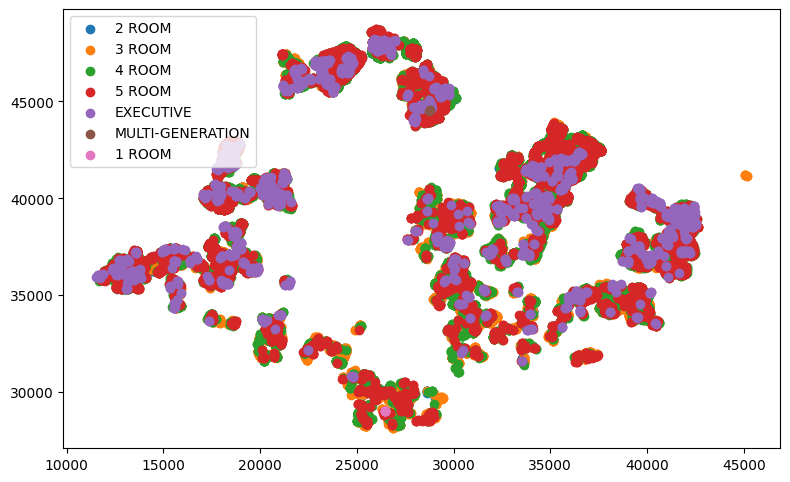

In [27]:
## quickly draw a map using the point coordinates, separate by flat type

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_aspect('equal')  # why do we need this here?
for m in hdb_df['flat_type'].unique():
  #print(m)
  tmp = hdb_df[hdb_df['flat_type']==m]
  ax.scatter(temp['X'], temp['Y'], label=m)
ax.legend()
plt.tight_layout()

<Axes: >

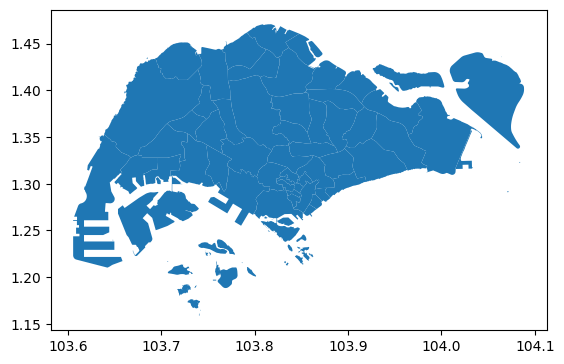

In [25]:
## load the planning area shapefile
parea_gdf = gpd.read_file(os.path.join(data_dir, 'master-plan-2019-planningarea.shp'))
parea_gdf.plot()  # what CRS is used to store the data?

In [26]:
parea_gdf2 = parea_gdf.to_crs('XXXX')  ## what should be used here?

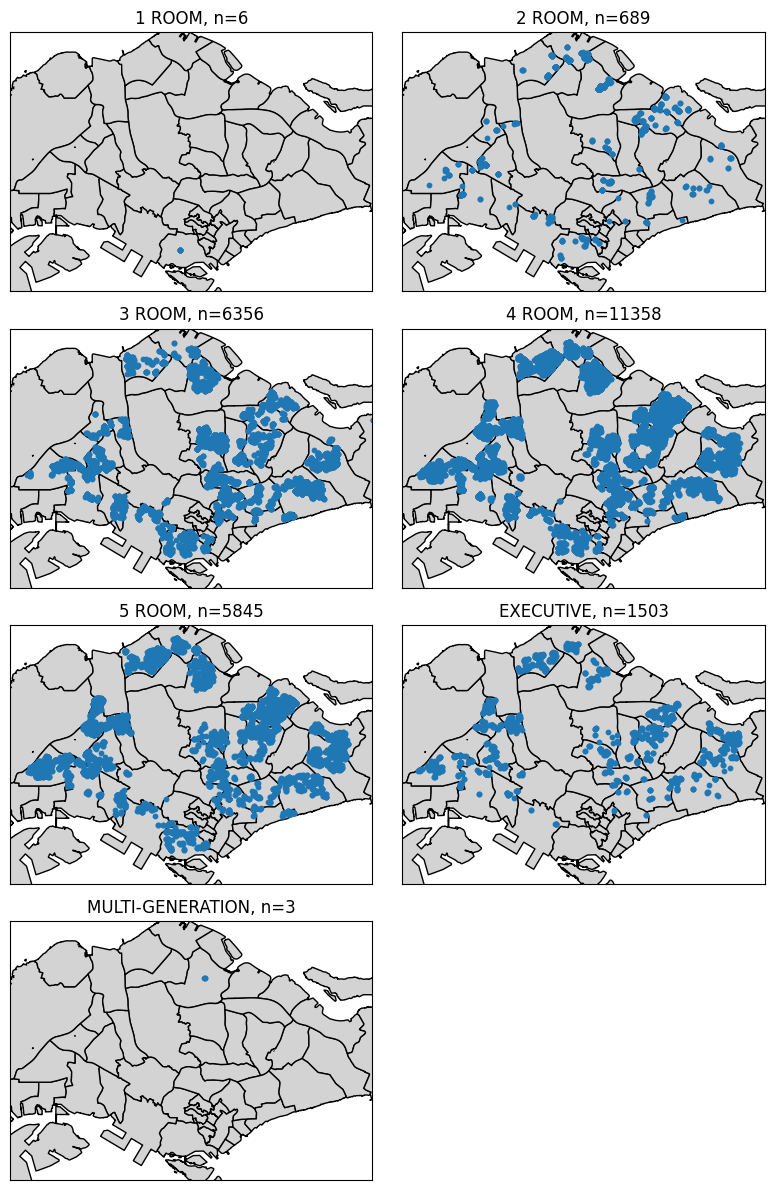

In [42]:
fig, axg = plt.subplots(4, 2, figsize=(8, 12))
axs = axg.flatten()

for i, m in enumerate(sorted(hdb_df['flat_type'].unique())):
  ax = axs[i]
  parea_gdf2.plot(fc='lightgrey', ec='k', ax=ax)
  #print(m)
  tmp = hdb_df[hdb_df['flat_type']==m]
  ax.scatter(tmp['X'], tmp['Y'], label=m, s=10)
  ax.set_xlim([10000, 45000])
  ax.set_ylim([25000, 50000])
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title('{}, n={}'.format(m, len(tmp)))
axs[-1].axis('off')  # what does this mean?
plt.tight_layout()